# Data Collection and Analysis for Training Data

### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy as stats
import pandas as pd

Load data from file

In [5]:
def load_data(file_path, model=None):
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_vector.pkl'
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_grid.pkl'

    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        data = np.array(data)
    
        
    # load data as dataframe
    if model == 'tql': data = {'scores': data[0], 'apple': data[1], 'time per apple': data[1] / (data[0]/10)}
    else: data = {'scores': data[0],
            'steps_per_game': data[1],
            'epsilon': data[2],
            'game': np.arange(len(data[0])),
            'steps' : np.cumsum(data[1]),
            'time per apple': data[1] / (data[0]/10)
            }
    dataframe = pd.DataFrame(data = data)

    return dataframe 

# Defining data
onestep = load_data(file_path='DQL_PLOT/TEST_PLOTS/onestep_training_17_01.pkl')
vector = load_data(file_path='DQL_PLOT/TEST_PLOTS/vector_training_17_01.pkl')
tql = load_data(file_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.pkl', model="tql")
onestep



/var/folders/tc/p_2dw00d5zg0svx3_qj__8tc0000gn/T/ipykernel_89717/2920019626.py:17: RuntimeWarning: divide by zero encountered in divide
  'time per apple': data[1] / (data[0]/10)


,scores,steps_per_game,epsilon,game,steps,time per apple
0,0.0,68.0,0.999980,0,68.0,inf
1,0.0,54.0,0.999963,1,122.0,inf
2,0.0,47.0,0.999949,2,169.0,inf
3,0.0,18.0,0.999944,3,187.0,inf
4,0.0,17.0,0.999939,4,204.0,inf
...,...,...,...,...,...,...
157495,20.0,73.0,0.010000,157495,23813491.0,36.500000
157496,200.0,298.0,0.010000,157496,23813789.0,14.900000
157497,200.0,283.0,0.010000,157497,23814072.0,14.150000
157498,200.0,308.0,0.010000,157498,23814380.0,15.400000


Export CSV

In [72]:
# Export as csv from pickle
def export_csv(dataframe=None, save_path=None):
    return dataframe.to_csv(save_path, index=False)

# input variables
dataframe = tql
save_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.csv'

# Export to csv
export_csv(dataframe, save_path)


Plot score data

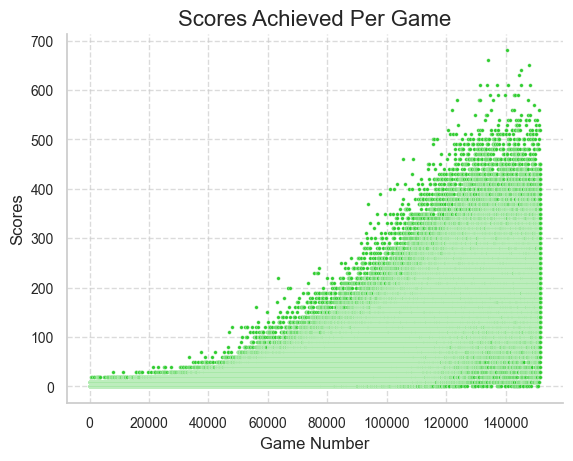

In [73]:
""" plt.scatter(games, scores)
plt.title('Scores Achieved Per Game')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.show() """



sns.set(style="whitegrid")
sns.scatterplot(x=onestep['game'], y=onestep['scores'], s=7, color="limegreen")
plt.title('Scores Achieved Per Game', fontsize=16)
plt.xlabel('Game Number')
plt.ylabel('Scores')
# plt.gca().invert_xaxis() # Invert axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()
plt.show()

## Line plot

In [74]:
def get_batch(dataframe, mode='max', batch_size=100):


    # Defining array 
    score = np.array(dataframe['scores'])
    game = np.array(dataframe['steps'])

    # Calculate the number of batches and the size of the last batch
    num_batches = len(score) // batch_size
    last_batch_size = len(score) % batch_size

    # Creating batches
    batched_games = np.array(np.split(score[0: num_batches*batch_size], num_batches))

    if mode == 'mean':
        # Calculating mean of each batch
        batched_rest_mean = np.array(np.mean(score[num_batches*batch_size:]))
        batched_mean = np.mean(batched_games, axis=1)
    if mode == 'max':
        batched_rest_mean = np.array(np.max(score[num_batches*batch_size:]))
        batched_mean = np.max(batched_games, axis=1)

    # Greating batched mean and batched game
    batched_score = np.concatenate((batched_mean, [batched_rest_mean]))
    batched_game = game[::batch_size]

    data = {'score' : batched_score,
            'steps' : batched_game}
    
    batched_df = pd.DataFrame(data = data)

    return batched_df

onestep_max = get_batch(onestep, mode='mean', batch_size=500)

score = np.array(vector['scores'])
convert = len(score)//len(onestep_max)

vector_max = get_batch(vector, mode='mean', batch_size=convert)

score = np.array(vector['scores'])
len(score)//len(onestep_max)

display(onestep_max, vector_max)




,score,steps
0,1.34,68.0
1,1.24,32605.0
2,1.42,66840.0
3,1.22,98587.0
4,1.52,132215.0
...,...,...
299,212.14,21166781.0
300,216.04,21325553.0
301,220.82,21487125.0
302,225.38,21653301.0


,score,steps
0,0.962672,54.0
1,1.060904,24249.0
2,1.119843,48238.0
3,1.001965,74264.0
4,0.884086,100667.0
...,...,...
300,241.905697,23540636.0
301,247.288802,23732122.0
302,245.952849,23929505.0
303,247.347741,24127284.0


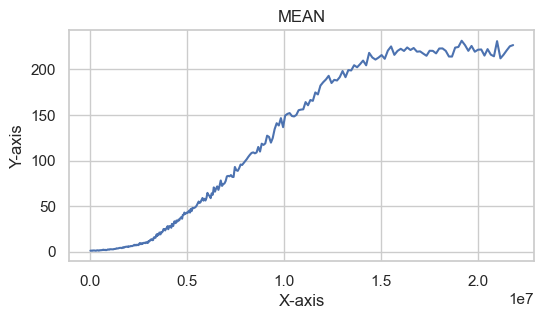

In [78]:
import matplotlib.pyplot as plt

# Create a figure with a 1x2 grid layout (1 row, 2 columns)
plt.figure(figsize=(6,3))  # Adjust the figure size as needed

# Plot the first subplot (left)
plt.plot(onestep_max['steps'], onestep_max['score'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('MEAN')

# Show the plots
plt.show()

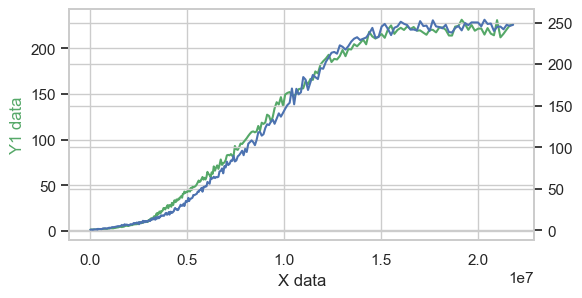

In [77]:
# Define axis
x = onestep_max['steps']
y1 = onestep_max['score']
y2 = vector_max['score'][:304]

# Plot configurations
fig, ax1 = plt.subplots(figsize=(6,3))

# Plot colours
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# axis labels
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

# Add grid to both axes
ax1.grid(True)
ax2.grid(True)



(array([79.,  0.,  0., ...,  0.,  0.,  1.]),
 array([ 10.    ,  10.0268,  10.0536, ..., 679.9464, 679.9732, 680.    ]),
 <BarContainer object of 25000 artists>)

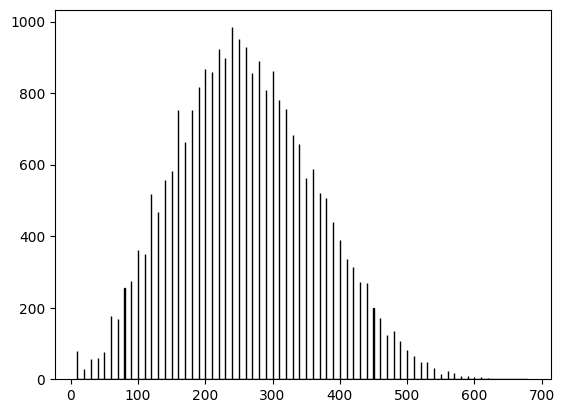

In [68]:
# Define x-axis
x = tql['scores']

# Histogram
plt.hist(x, bins=25000, edgecolor='black')


Plot Running Mean Score

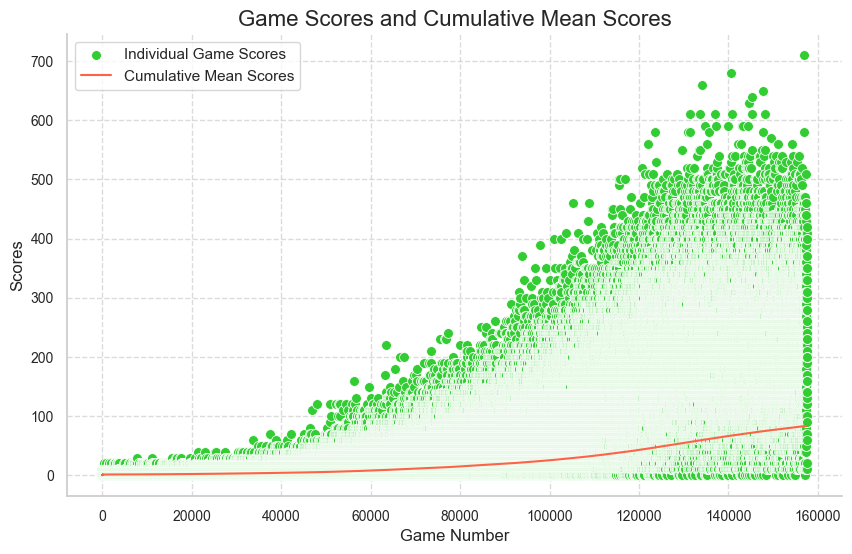

In [12]:
scores = onestep["scores"]
games = np.arange(1, len(scores) + 1)
cumulative_mean_scores = np.cumsum(scores) / games

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=games, y=scores, s=50, label='Individual Game Scores', color='limegreen')
sns.lineplot(x=games, y=cumulative_mean_scores, label='Cumulative Mean Scores', color='tomato')
plt.title('Game Scores and Cumulative Mean Scores', fontsize=16)
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()


Plot 95% Confidence Intervals

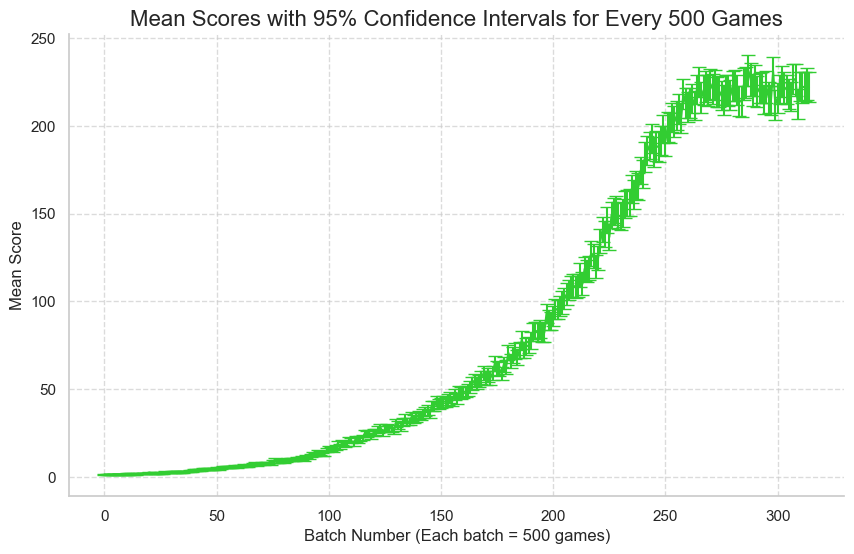

In [20]:
batch_size = 500 
batch = list(range(0, len(scores), batch_size))
mean_scores = []
confidence_intervals = []

# Mean and Confidence Intervals for each batch
for i in range(0, len(scores), batch_size):
    block = scores[i:i + batch_size]
    if len(block) == 0:
        continue

    mean = np.mean(block)
    std_dev = np.std(block)

    conf_ints = 1.96 * (std_dev / math.sqrt(len(block)))
    mean_scores.append(mean)
    confidence_intervals.append(conf_ints)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=confidence_intervals, capsize=5, label='Mean with 95% Confidence Intervals', color='limegreen')

plt.title('Mean Scores with 95% Confidence Intervals for Every 500 Games', fontsize=16)
plt.xlabel('Batch Number (Each batch = 500 games)')
plt.ylabel('Mean Score')

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

plt.show()